# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

pd.set_option('display.max_columns', None)

In [2]:


def explain(sl, moves, update_f=None):
    
    n = len(moves)+1
    
    fig, axes = plt.subplots(n,1, figsize=(20,n*2.5))
    axes = np.ravel(axes)
    axi = 0

    for move in moves:
        s = sl.rmove(move, update=True if update_f is None else False )
        plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
        display(sl.params); 
        print('---')
        if update_f:
            update_f(sl, s)
            
    plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
    display(sl.params); 
    print('---')

0.3002|[0        250↗   501@5000  ↘250        0] 0.0
0.3002|[0       -250↗  -501@5000  ↘-250       0] 0.0
0.2502|[0        250↗   751@5000  ↘0       5000] 0.0
0.1001|[5000       0↗   500@5000  ↘0       5000] 0.0
0.2002|[5000       0↗  1001@5000  ↘0       5000] 0.0
0.2502|[5000       0↗   751@5000  ↘250        0] 0.0

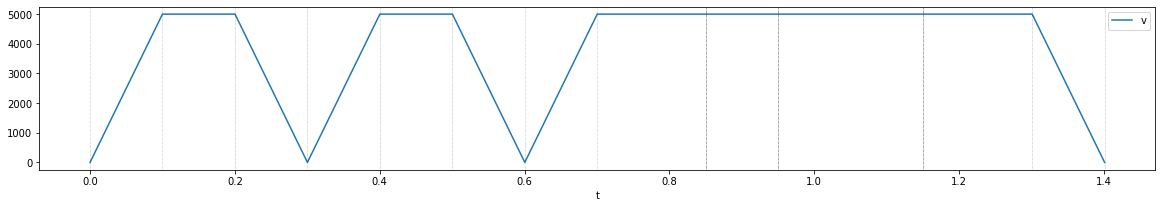

In [3]:
def run(joints, moves):
    sl = SegmentList(joints)
    
    for move in moves:
        sl.rmove(move)
        
    return sl

x = 1000 + 1
sl = run([Joint(5_000, 50_000)],( [x], [-x], [x], [x/2], [x],[x] ))
plot_segment_list(sl.dataframe)
sl

[0.7, 0.65]
[0.7, 0.6]
[0.65, 0.6]
[0.3, 0.6]
[0.6, 0.6]
[0.65, 0.65]


0.7000|[0        250↗  2500@5000  ↘250        0] [0        250↗  2750@5000  ↘0       5000] 0.0
0.7000|[0       -250↗ -2500@5000  ↘-250       0] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6500|[0        250↗  2750@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6000|[5000       0↗  1500@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6000|[5000       0↗  3000@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6500|[5000       0↗  2750@5000  ↘250        0] [5000       0↗  2750@5000  ↘250        0] 0.0

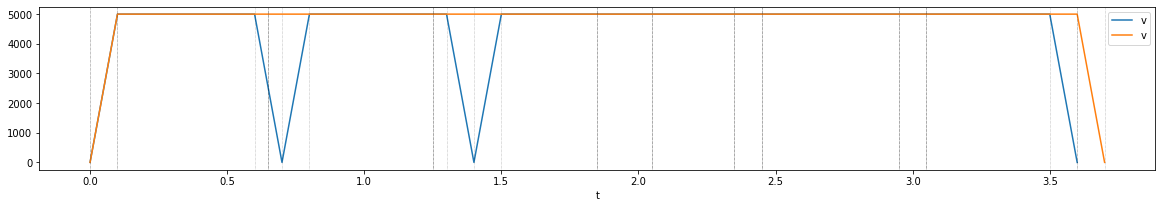

In [4]:
x = 3000
sl = run([Joint(5_000, 50_000),Joint(5_000, 50_000)],( [x,x], [-x,x], [x,x], [x/2,x], [x,x],[x,x] ))
plot_segment_list(sl.dataframe)

for s in sl:
    print([js.t for js in s])
    

sl

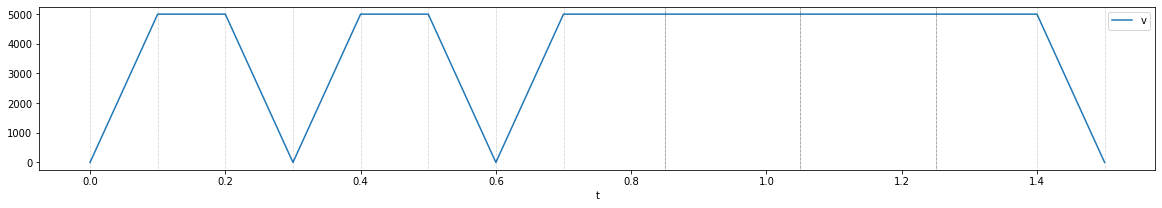

In [5]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])
x = 1000

sl.rmove([x])
sl.rmove([-x])
sl.rmove([x])
sl.rmove([1000])
sl.rmove([x])
sl.rmove([x])

plot_segment_list(sl.dataframe)


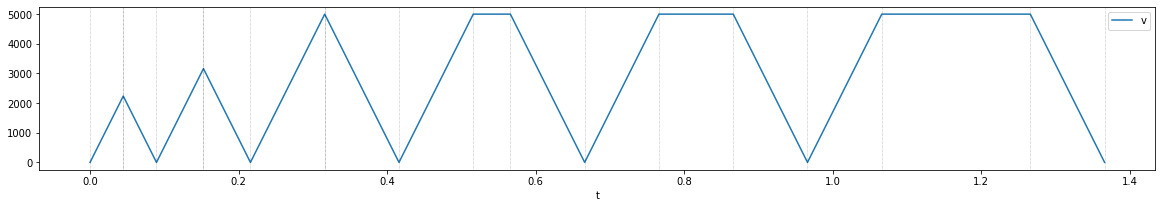

In [6]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])

sl.rmove([100])
sl.rmove([-200])
sl.rmove([500])
sl.rmove([-750])
sl.rmove([1000])
sl.rmove([-1500])

plot_segment_list(sl.dataframe)

        

/Users/eric/Documents/proj/trajectory/trajectory/plot.py:32: UserWarning: Discontinuty 0/1d@3829.93 -> 1/1a@5000.0
  warn(f"Discontinuty {a}@{last_row.v_f} -> {b}@{r.v_i}")


,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.100000,0,0,250.0,0,0.00,5000.00,0,a,0.100000,250.000000,0.000000e+00
1,0.202000,0,0,510.0,0,5000.00,5000.00,0,c,0.102000,510.000000,5.684342e-14
2,0.302000,0,0,250.0,0,5000.00,0.00,0,d,0.100000,250.000000,0.000000e+00
3,0.075247,0,1,142.0,0,0.00,3829.93,5000,a,0.075247,144.096329,-2.096329e+00
4,0.302000,0,1,868.0,0,3829.93,3829.93,5000,c,0.226752,868.446202,-4.462023e-01
5,0.302000,0,1,0.0,0,3829.93,3829.93,5000,d,0.000000,0.000000,0.000000e+00
6,0.302000,1,0,0.0,0,0.00,0.00,0,a,0.000000,0.000000,0.000000e+00
7,0.504000,1,0,0.0,0,0.00,0.00,0,c,0.202000,0.000000,0.000000e+00
8,0.504000,1,0,0.0,0,0.00,0.00,0,d,0.000000,0.000000,0.000000e+00
9,0.302000,1,1,0.0,5000,5000.00,5000.00,5000,a,0.000000,0.000000,0.000000e+00


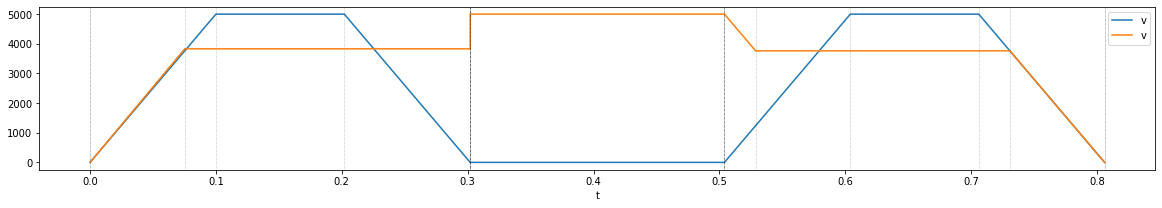

In [21]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])
x = 1000+10

sl.rmove([x,x])
sl.rmove([0,x])
sl.rmove([x,x])


plot_segment_list(sl.dataframe)

display(sl.dataframe)

In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([100,x]);
sl.rmove([x,x]);
sl.rmove([0,x]);
sl.rmove([x,x]);


plot_segment_list(sl.dataframe)
t = sl.params
t[t.js == 0]

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 501

sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 499


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
sl = SegmentList([Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(5,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)
